In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, 
                            recall_score, f1_score, confusion_matrix)

In [31]:

# Load data
df=pd.read_csv('imdb_urdu_reviews_test.csv')
df

,review,sentiment
0,یہ بے گھر خواتین کے بارے میں ایک دستاویزی فلم ...,negative
1,بالکل بھی اچھ ،ی کام نہیں کیا گیا ، پوری فلم ص...,negative
2,یہ عجیب بات ہے کہ کچھ لوگوں کا کیا حشر ہوتا ہے...,negative
3,اور یہ خاص طور پر وکیلوں اور پولیس اہلکاروں کے...,positive
4,پہلے ، ایک وضاحت: میری سرخی کے باوجود ، میں اس...,positive
...,...,...
9995,اگر آپ چیخنا چاہتے ہو یا بڑے اسٹوڈیو ہارر پراڈ...,positive
9996,براہ راست یہ ایک محض ایک چھوٹی سی چھوٹی چھوٹی ...,positive
9997,میں نے اس فلم کو کل رات آدھی رات کو چپکے سے پہ...,negative
9998,دیکھنا کوئی آسان فلم نہیں ہے - یہ ساڑھے تین گھ...,positive


In [33]:
df.columns

Index(['review', 'sentiment'], dtype='object')

In [44]:
df['sentiment'] = df['sentiment'].map({'positive': 0, 'negative': 1})

In [46]:
df

,review,sentiment
0,یہ بے گھر خواتین کے بارے میں ایک دستاویزی فلم ...,1
1,بالکل بھی اچھ ،ی کام نہیں کیا گیا ، پوری فلم ص...,1
2,یہ عجیب بات ہے کہ کچھ لوگوں کا کیا حشر ہوتا ہے...,1
3,اور یہ خاص طور پر وکیلوں اور پولیس اہلکاروں کے...,0
4,پہلے ، ایک وضاحت: میری سرخی کے باوجود ، میں اس...,0
...,...,...
9995,اگر آپ چیخنا چاہتے ہو یا بڑے اسٹوڈیو ہارر پراڈ...,0
9996,براہ راست یہ ایک محض ایک چھوٹی سی چھوٹی چھوٹی ...,0
9997,میں نے اس فلم کو کل رات آدھی رات کو چپکے سے پہ...,1
9998,دیکھنا کوئی آسان فلم نہیں ہے - یہ ساڑھے تین گھ...,0


In [48]:
# Split data
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['review'], df['sentiment'], test_size=0.2, random_state=42
)

# Unigram


=== Top 4 Models of Unigram ===
| Classifier          | N-Gram      |   Accuracy |   Precision |   Recall |       F1 |
|:--------------------|:------------|-----------:|------------:|---------:|---------:|
| Logistic Regression | Unigram (U) |     0.835  |    0.834202 | 0.823893 | 0.829016 |
| Naive Bayes         | Unigram (U) |     0.81   |    0.789422 | 0.830072 | 0.809237 |
| SVM                 | Unigram (U) |     0.808  |    0.806048 | 0.796087 | 0.801036 |
| Random Forest       | Unigram (U) |     0.8095 |    0.829978 | 0.764161 | 0.79571  |


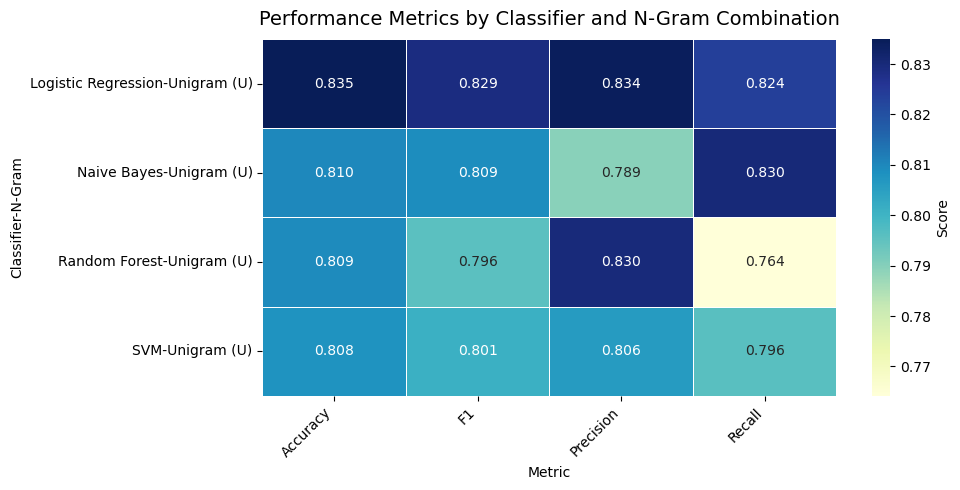

In [51]:

# Classifiers to compare
classifiers = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(kernel='linear', probability=True),
    'Random Forest': RandomForestClassifier(n_estimators=100)
}
# N-gram combinations
ngram_configs = {
    'Unigram (U)': (1, 1)
    
}

# Store results
results = []

# Process each classifier and n-gram
for clf_name, clf in classifiers.items():
    for ngram_name, ngram_range in ngram_configs.items():
        # Vectorize text
        vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
        X_train = vectorizer.fit_transform(train_texts)
        clf.fit(X_train, train_labels)
        
        # Predictions
        X_test = vectorizer.transform(test_texts)
        y_pred = clf.predict(X_test)
        
        # Metrics
        accuracy = accuracy_score(test_labels, y_pred)
        precision = precision_score(test_labels, y_pred)
        recall = recall_score(test_labels, y_pred)
        f1 = f1_score(test_labels, y_pred)
        
        # Store results
        results.append({
            'Classifier': clf_name,
            'N-Gram': ngram_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1': f1
        })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Print top models
print("\n=== Top 4 Models of Unigram ===")
print(results_df.sort_values(by='F1', ascending=False).head(5).to_markdown(index=False))

# Melt for visualization
melted_df = pd.melt(results_df, 
                    id_vars=['Classifier', 'N-Gram'],
                    value_vars=['Accuracy', 'Precision', 'Recall', 'F1'],
                    var_name='Metric',
                    value_name='Score')

# Create heatmap
plt.figure(figsize=(10, 5))
heatmap_data = melted_df.pivot_table(
    index=['Classifier', 'N-Gram'],
    columns='Metric',
    values='Score'
)

sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".3f",
    cmap="YlGnBu",
    linewidths=0.5,
    cbar_kws={'label': 'Score'}
)

plt.title('Performance Metrics by Classifier and N-Gram Combination', pad=10, fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Optional: Save results to CSV
results_df.to_csv('spam_detection_metrics.csv', index=False)

# Bigram


=== Top 4 Models of Bigram ===
| Classifier          | N-Gram     |   Accuracy |   Precision |   Recall |       F1 |
|:--------------------|:-----------|-----------:|------------:|---------:|---------:|
| Naive Bayes         | Bigram (B) |     0.855  |    0.838806 | 0.868177 | 0.853239 |
| SVM                 | Bigram (B) |     0.834  |    0.838812 | 0.814624 | 0.826541 |
| Logistic Regression | Bigram (B) |     0.832  |    0.838126 | 0.810505 | 0.824084 |
| Random Forest       | Bigram (B) |     0.8025 |    0.821429 | 0.757981 | 0.788431 |


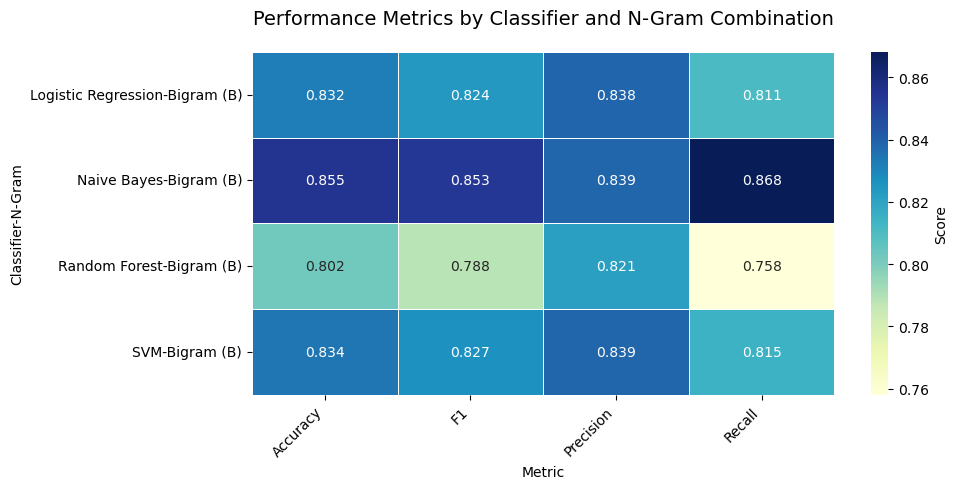

In [53]:

# Classifiers to compare
classifiers = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(kernel='linear', probability=True),
    'Random Forest': RandomForestClassifier(n_estimators=100)
}
# N-gram combinations
ngram_configs = {
    'Bigram (B)': (2, 2)
    
}

# Store results
results = []

# Process each classifier and n-gram
for clf_name, clf in classifiers.items():
    for ngram_name, ngram_range in ngram_configs.items():
        # Vectorize text
        vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
        X_train = vectorizer.fit_transform(train_texts)
        clf.fit(X_train, train_labels)
        
        # Predictions
        X_test = vectorizer.transform(test_texts)
        y_pred = clf.predict(X_test)
        
        # Metrics
        accuracy = accuracy_score(test_labels, y_pred)
        precision = precision_score(test_labels, y_pred)
        recall = recall_score(test_labels, y_pred)
        f1 = f1_score(test_labels, y_pred)
        
        # Store results
        results.append({
            'Classifier': clf_name,
            'N-Gram': ngram_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1': f1
        })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Print top models
print("\n=== Top 4 Models of Bigram ===")
print(results_df.sort_values(by='F1', ascending=False).head(5).to_markdown(index=False))

# Melt for visualization
melted_df = pd.melt(results_df, 
                    id_vars=['Classifier', 'N-Gram'],
                    value_vars=['Accuracy', 'Precision', 'Recall', 'F1'],
                    var_name='Metric',
                    value_name='Score')

# Create heatmap
plt.figure(figsize=(10, 5))
heatmap_data = melted_df.pivot_table(
    index=['Classifier', 'N-Gram'],
    columns='Metric',
    values='Score'
)

sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".3f",
    cmap="YlGnBu",
    linewidths=0.5,
    cbar_kws={'label': 'Score'}
)

plt.title('Performance Metrics by Classifier and N-Gram Combination', pad=20, fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Optional: Save results to CSV
results_df.to_csv('spam_detection_metrics.csv', index=False)

# Trigram


=== Top 4 Models of Trigram ===
| Classifier          | N-Gram      |   Accuracy |   Precision |   Recall |       F1 |
|:--------------------|:------------|-----------:|------------:|---------:|---------:|
| Naive Bayes         | Trigram (T) |     0.837  |    0.815867 | 0.857878 | 0.836345 |
| SVM                 | Trigram (T) |     0.796  |    0.798515 | 0.775489 | 0.786834 |
| Logistic Regression | Trigram (T) |     0.7925 |    0.794492 | 0.7724   | 0.78329  |
| Random Forest       | Trigram (T) |     0.7535 |    0.81039  | 0.642636 | 0.716829 |


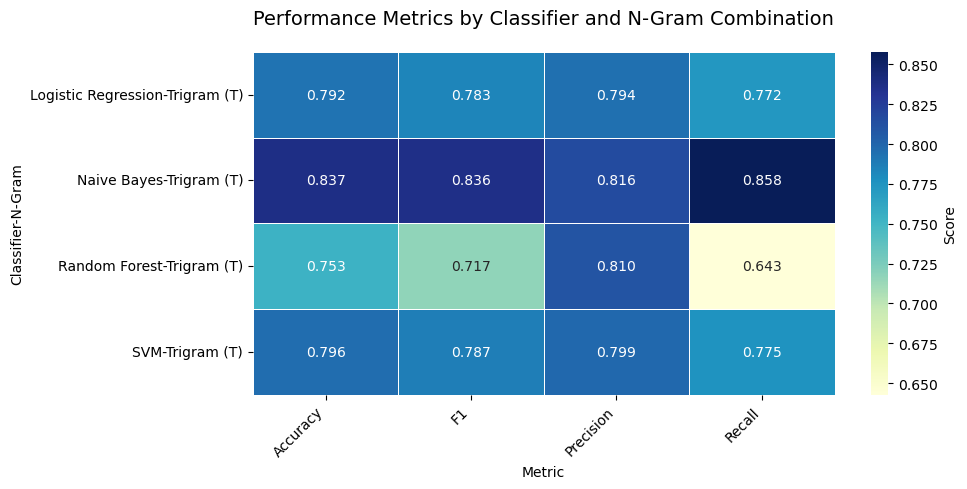

In [55]:

# Classifiers to compare
classifiers = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(kernel='linear', probability=True),
    'Random Forest': RandomForestClassifier(n_estimators=100)
}
# N-gram combinations
ngram_configs = {
    'Trigram (T)': (3, 3)
    
}

# Store results
results = []

# Process each classifier and n-gram
for clf_name, clf in classifiers.items():
    for ngram_name, ngram_range in ngram_configs.items():
        # Vectorize text
        vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
        X_train = vectorizer.fit_transform(train_texts)
        clf.fit(X_train, train_labels)
        
        # Predictions
        X_test = vectorizer.transform(test_texts)
        y_pred = clf.predict(X_test)
        
        # Metrics
        accuracy = accuracy_score(test_labels, y_pred)
        precision = precision_score(test_labels, y_pred)
        recall = recall_score(test_labels, y_pred)
        f1 = f1_score(test_labels, y_pred)
        
        # Store results
        results.append({
            'Classifier': clf_name,
            'N-Gram': ngram_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1': f1
        })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Print top models
print("\n=== Top 4 Models of Trigram ===")
print(results_df.sort_values(by='F1', ascending=False).head(5).to_markdown(index=False))

# Melt for visualization
melted_df = pd.melt(results_df, 
                    id_vars=['Classifier', 'N-Gram'],
                    value_vars=['Accuracy', 'Precision', 'Recall', 'F1'],
                    var_name='Metric',
                    value_name='Score')

# Create heatmap
plt.figure(figsize=(10, 5))
heatmap_data = melted_df.pivot_table(
    index=['Classifier', 'N-Gram'],
    columns='Metric',
    values='Score'
)

sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".3f",
    cmap="YlGnBu",
    linewidths=0.5,
    cbar_kws={'label': 'Score'}
)

plt.title('Performance Metrics by Classifier and N-Gram Combination', pad=20, fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Optional: Save results to CSV
results_df.to_csv('spam_detection_metrics.csv', index=False)

# Unigram + Bigram


=== Top 4 Models of Unigram + Bigram ===
| Classifier          | N-Gram   |   Accuracy |   Precision |   Recall |       F1 |
|:--------------------|:---------|-----------:|------------:|---------:|---------:|
| Logistic Regression | U+B      |     0.8525 |    0.858811 | 0.833162 | 0.845792 |
| SVM                 | U+B      |     0.8485 |    0.855319 | 0.828012 | 0.841444 |
| Naive Bayes         | U+B      |     0.8435 |    0.830986 | 0.850669 | 0.840712 |
| Random Forest       | U+B      |     0.824  |    0.841989 | 0.784758 | 0.812367 |


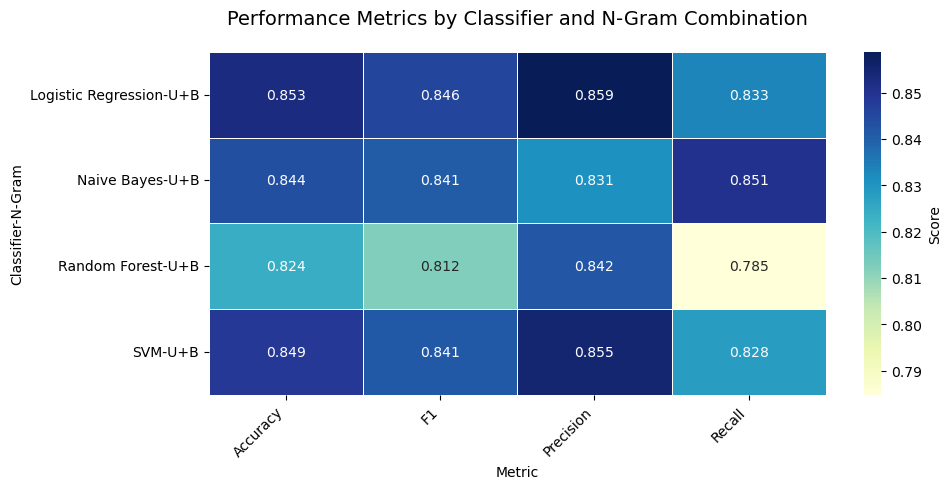

In [57]:

# Classifiers to compare
classifiers = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(kernel='linear', probability=True),
    'Random Forest': RandomForestClassifier(n_estimators=100)
}
# N-gram combinations
ngram_configs = {
    'U+B': (1, 2)
    
}

# Store results
results = []

# Process each classifier and n-gram
for clf_name, clf in classifiers.items():
    for ngram_name, ngram_range in ngram_configs.items():
        # Vectorize text
        vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
        X_train = vectorizer.fit_transform(train_texts)
        clf.fit(X_train, train_labels)
        
        # Predictions
        X_test = vectorizer.transform(test_texts)
        y_pred = clf.predict(X_test)
        
        # Metrics
        accuracy = accuracy_score(test_labels, y_pred)
        precision = precision_score(test_labels, y_pred)
        recall = recall_score(test_labels, y_pred)
        f1 = f1_score(test_labels, y_pred)
        
        # Store results
        results.append({
            'Classifier': clf_name,
            'N-Gram': ngram_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1': f1
        })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Print top models
print("\n=== Top 4 Models of Unigram + Bigram ===")
print(results_df.sort_values(by='F1', ascending=False).head(5).to_markdown(index=False))

# Melt for visualization
melted_df = pd.melt(results_df, 
                    id_vars=['Classifier', 'N-Gram'],
                    value_vars=['Accuracy', 'Precision', 'Recall', 'F1'],
                    var_name='Metric',
                    value_name='Score')

# Create heatmap
plt.figure(figsize=(10, 5))
heatmap_data = melted_df.pivot_table(
    index=['Classifier', 'N-Gram'],
    columns='Metric',
    values='Score'
)

sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".3f",
    cmap="YlGnBu",
    linewidths=0.5,
    cbar_kws={'label': 'Score'}
)

plt.title('Performance Metrics by Classifier and N-Gram Combination', pad=20, fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Optional: Save results to CSV
results_df.to_csv('spam_detection_metrics.csv', index=False)

# Unigram + Trigram

In [ ]:

# Classifiers to compare
classifiers = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(kernel='linear', probability=True),
    'Random Forest': RandomForestClassifier(n_estimators=100)
}
# N-gram combinations
ngram_configs = {
    'U+T': (1, 3)
    
}

# Store results
results = []

# Process each classifier and n-gram
for clf_name, clf in classifiers.items():
    for ngram_name, ngram_range in ngram_configs.items():
        # Vectorize text
        vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
        X_train = vectorizer.fit_transform(train_texts)
        clf.fit(X_train, train_labels)
        
        # Predictions
        X_test = vectorizer.transform(test_texts)
        y_pred = clf.predict(X_test)
        
        # Metrics
        accuracy = accuracy_score(test_labels, y_pred)
        precision = precision_score(test_labels, y_pred)
        recall = recall_score(test_labels, y_pred)
        f1 = f1_score(test_labels, y_pred)
        
        # Store results
        results.append({
            'Classifier': clf_name,
            'N-Gram': ngram_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1': f1
        })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Print top models
print("\n=== Top 4 Models of Unigram + Trigram ===")
print(results_df.sort_values(by='F1', ascending=False).head(5).to_markdown(index=False))

# Melt for visualization
melted_df = pd.melt(results_df, 
                    id_vars=['Classifier', 'N-Gram'],
                    value_vars=['Accuracy', 'Precision', 'Recall', 'F1'],
                    var_name='Metric',
                    value_name='Score')

# Create heatmap
plt.figure(figsize=(10, 5))
heatmap_data = melted_df.pivot_table(
    index=['Classifier', 'N-Gram'],
    columns='Metric',
    values='Score'
)

sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".3f",
    cmap="YlGnBu",
    linewidths=0.5,
    cbar_kws={'label': 'Score'}
)

plt.title('Performance Metrics by Classifier and N-Gram Combination', pad=20, fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Optional: Save results to CSV
results_df.to_csv('spam_detection_metrics.csv', index=False)

# Bigram + Trigram

In [ ]:

# Classifiers to compare
classifiers = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(kernel='linear', probability=True),
    'Random Forest': RandomForestClassifier(n_estimators=100)
}
# N-gram combinations
ngram_configs = {
    'B+T': (2, 3)
    
}

# Store results
results = []

# Process each classifier and n-gram
for clf_name, clf in classifiers.items():
    for ngram_name, ngram_range in ngram_configs.items():
        # Vectorize text
        vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
        X_train = vectorizer.fit_transform(train_texts)
        clf.fit(X_train, train_labels)
        
        # Predictions
        X_test = vectorizer.transform(test_texts)
        y_pred = clf.predict(X_test)
        
        # Metrics
        accuracy = accuracy_score(test_labels, y_pred)
        precision = precision_score(test_labels, y_pred)
        recall = recall_score(test_labels, y_pred)
        f1 = f1_score(test_labels, y_pred)
        
        # Store results
        results.append({
            'Classifier': clf_name,
            'N-Gram': ngram_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1': f1
        })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Print top models
print("\n=== Top 4 Models of Bigram + Trigram ===")
print(results_df.sort_values(by='F1', ascending=False).head(5).to_markdown(index=False))

# Melt for visualization
melted_df = pd.melt(results_df, 
                    id_vars=['Classifier', 'N-Gram'],
                    value_vars=['Accuracy', 'Precision', 'Recall', 'F1'],
                    var_name='Metric',
                    value_name='Score')

# Create heatmap
plt.figure(figsize=(10, 5))
heatmap_data = melted_df.pivot_table(
    index=['Classifier', 'N-Gram'],
    columns='Metric',
    values='Score'
)

sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".3f",
    cmap="YlGnBu",
    linewidths=0.5,
    cbar_kws={'label': 'Score'}
)

plt.title('Performance Metrics by Classifier and N-Gram Combination', pad=20, fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Optional: Save results to CSV
results_df.to_csv('spam_detection_metrics.csv', index=False)

# Unigram + Bigram + Trigram

In [ ]:

# Classifiers to compare
classifiers = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(kernel='linear', probability=True),
    'Random Forest': RandomForestClassifier(n_estimators=100)
}
# N-gram combinations
ngram_configs = {
    'U+B+T': (1,3)
    
}

# Store results
results = []

# Process each classifier and n-gram
for clf_name, clf in classifiers.items():
    for ngram_name, ngram_range in ngram_configs.items():
        # Vectorize text
        vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
        X_train = vectorizer.fit_transform(train_texts)
        clf.fit(X_train, train_labels)
        
        # Predictions
        X_test = vectorizer.transform(test_texts)
        y_pred = clf.predict(X_test)
        
        # Metrics
        accuracy = accuracy_score(test_labels, y_pred)
        precision = precision_score(test_labels, y_pred)
        recall = recall_score(test_labels, y_pred)
        f1 = f1_score(test_labels, y_pred)
        
        # Store results
        results.append({
            'Classifier': clf_name,
            'N-Gram': ngram_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1': f1
        })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Print top models
print("\n=== Top 4 Models of Unigram + Bigram + Trigram ===")
print(results_df.sort_values(by='F1', ascending=False).head(5).to_markdown(index=False))

# Melt for visualization
melted_df = pd.melt(results_df, 
                    id_vars=['Classifier', 'N-Gram'],
                    value_vars=['Accuracy', 'Precision', 'Recall', 'F1'],
                    var_name='Metric',
                    value_name='Score')

# Create heatmap
plt.figure(figsize=(10, 5))
heatmap_data = melted_df.pivot_table(
    index=['Classifier', 'N-Gram'],
    columns='Metric',
    values='Score'
)

sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".3f",
    cmap="YlGnBu",
    linewidths=0.5,
    cbar_kws={'label': 'Score'}
)

plt.title('Performance Metrics by Classifier and N-Gram Combination', pad=20, fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Optional: Save results to CSV
results_df.to_csv('spam_detection_metrics.csv', index=False)

# All in One N_Grams (Unigram , Bigram , Trigram , U+B , U+T , B+T , U+B+T ) 

In [ ]:


# Load data
df = pd.read_csv('spam.csv', encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'text']
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Split data
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['text'], df['label'], test_size=0.2, random_state=42
)

# Classifiers to compare
classifiers = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(kernel='linear', probability=True),
    'Random Forest': RandomForestClassifier(n_estimators=100)
}

# N-gram combinations
ngram_configs = {
    'Unigram (U)': (1, 1),
    'Bigram (B)': (2, 2),
    'Trigram (T)': (3, 3),
    'U+B': (1, 2),
    'U+T': (1, 3),
    'B+T': (2, 3),
    'U+B+T': (1, 3)
}

# Store results
results = []

# Process each classifier and n-gram
for clf_name, clf in classifiers.items():
    for ngram_name, ngram_range in ngram_configs.items():
        # Vectorize text
        vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
        X_train = vectorizer.fit_transform(train_texts)
        clf.fit(X_train, train_labels)
        
        # Predictions
        X_test = vectorizer.transform(test_texts)
        y_pred = clf.predict(X_test)
        
        # Metrics
        accuracy = accuracy_score(test_labels, y_pred)
        precision = precision_score(test_labels, y_pred)
        recall = recall_score(test_labels, y_pred)
        f1 = f1_score(test_labels, y_pred)
        
        # Store results
        results.append({
            'Classifier': clf_name,
            'N-Gram': ngram_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1': f1
        })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Print top models
print("\n=== Top 5 Models ===")
print(results_df.sort_values(by='F1', ascending=False).head(5).to_markdown(index=False))

# Melt for visualization
melted_df = pd.melt(results_df, 
                    id_vars=['Classifier', 'N-Gram'],
                    value_vars=['Accuracy', 'Precision', 'Recall', 'F1'],
                    var_name='Metric',
                    value_name='Score')

# Create heatmap
plt.figure(figsize=(10, 5))
heatmap_data = melted_df.pivot_table(
    index=['Classifier', 'N-Gram'],
    columns='Metric',
    values='Score'
)

sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".3f",
    cmap="YlGnBu",
    linewidths=0.5,
    cbar_kws={'label': 'Score'}
)

plt.title('Performance Metrics by Classifier and N-Gram Combination', pad=20, fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Optional: Save results to CSV
results_df.to_csv('spam_detection_metrics.csv', index=False)

# 1. Performance Summary Statistics


In [67]:
# Calculate mean metrics across all n-grams for each classifier
summary_stats = results_df.groupby('Classifier').agg({
    'Accuracy': 'mean',
    'Precision': 'mean',
    'Recall': 'mean',
    'F1': 'mean'
}).sort_values(by='F1', ascending=False)

print("\n=== Classifier Performance Summary ===")
print(summary_stats.to_markdown(floatfmt=".3f"))


=== Classifier Performance Summary ===
| Classifier          |   Accuracy |   Precision |   Recall |    F1 |
|:--------------------|-----------:|------------:|---------:|------:|
| Naive Bayes         |      0.984 |       0.971 |    0.907 | 0.938 |
| Logistic Regression |      0.974 |       1.000 |    0.807 | 0.893 |
| SVM                 |      0.974 |       1.000 |    0.807 | 0.893 |
| Random Forest       |      0.966 |       1.000 |    0.747 | 0.855 |


# Best Model Identification

In [74]:
best_overall = summary_stats.idxmax()
print("\n=== Best Classifier by Metric ===")
print(best_overall.to_markdown())


=== Best Classifier by Metric ===
|           | 0                   |
|:----------|:--------------------|
| Accuracy  | Naive Bayes         |
| Precision | Logistic Regression |
| Recall    | Naive Bayes         |
| F1        | Naive Bayes         |
